# Workbook Objective: 
### Examine School data
_____

#### Import Libraries

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings

#
#### Import data

In [273]:
df_school_sat = pd.read_csv('./data-clean/sat_ca_school_2019.csv')
df_school_act = pd.read_csv('./data-clean/act_ca_school_2019.csv')
df_housing = pd.read_csv('./data-clean/housing_values_2021.csv')

In [274]:
df_school_sat.head()

,local_id,county_id,county_dist_id,school_id,record_type,school_name,dist_name,county_name,enrollment_12,test_takers,avg_eng,pct_eng,avg_math,pct_math,abv_avg_both,abv_pct_both,year,is_charter
0,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31,30.39,14,13.73,14,13.73,2019,0
1,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54,47.79,18,15.93,18,15.93,2019,0
2,1.964734e+13,19.0,1964733.0,6061451.0,S,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,68,64.15,36,33.96,36,33.96,2019,0
3,3.073635e+13,30.0,3073635.0,3034956.0,S,Mission Viejo High,Saddleback Valley Unified,Orange,562.0,190.0,161,84.74,138,72.63,132,69.47,2019,0
4,3.367215e+13,33.0,3367215.0,3336955.0,S,Abraham Lincoln Continuation,Riverside Unified,Riverside,114.0,17.0,3,17.65,2,11.76,2,11.76,2019,0


In [275]:
df_school_act.head()

,local_id,county_id,county_dist_id,school_id,record_type,school_name,dist_name,county_name,enrollment_12,test_takers,avg_read,avg_eng,avg_math,avg_sci,abv_avg_num,abv_avg_pct,year,is_charter
0,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2019,0
1,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2019,0
2,1.976968e+13,19.0,1976968.0,109926.0,S,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,15,15,17,16,3,9.09,2019,1
3,1.964733e+13,19.0,1964733.0,126615.0,S,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,18,18,18,17,5,31.25,2019,0
4,1.965136e+13,19.0,1965136.0,1996321.0,S,Academy of the Canyons,William S. Hart Union High,Los Angeles,104.0,36.0,29,29,25,25,34,94.44,2019,0


In [276]:
df_housing.head()

,county_name,med_home_value
0,Alameda,854696
1,Alpine,419080
2,Amador,359884
3,Butte,377765
4,Calaveras,366538


#
#### Populate color scheme dictionary

In [277]:
colors_h = {
    '1'         : '#f0541b',   # Public
    '2'         : '#fc742f',
    '3'         : '#F29544',
    '4'         : '#f7ae65',
    '5'         : '#fdd69a',
    '6'         : '#F2ECCE',
    '7'         : '#aae9ee',
    '8'         : '#6bc8cf',
    '9'         : '#50ABBF',
    '10'        : '#3F9BBF',
    '11'        : '#4285f4',
    '12'        : '#1B65A6',   # Charter
    'charter'   : '#f0541b',
    'public'    : '#1B65A6',
    'edge'      : '#cccccc',
    'bg'        : '#E0E0E0',
}

#
#### Merge SAT & ACT data for correlation testing

In [278]:
both_scores = pd.merge(
    left=df_school_sat,
    right=df_school_act[['local_id', 'abv_avg_pct']],
    how='left',
    on='local_id'
)

#
#### Drop State appointed identifier columns

In [279]:
both_scores.drop(columns=['local_id', 'county_id', 'county_dist_id', 'school_id', 'record_type', 'year'], inplace=True)
df_school_sat.drop(columns=['local_id', 'county_id', 'county_dist_id', 'school_id', 'record_type', 'year'], inplace=True)
df_school_act.drop(columns=['local_id', 'county_id', 'county_dist_id', 'school_id', 'record_type', 'year'], inplace=True)

In [280]:
df_school_sat.shape

(1261, 12)

In [281]:
both_scores.shape

(1261, 13)

#
#### Drop incomplete data & inspect loss of observation magnitude

In [282]:
both_scores.dropna(inplace=True)

In [283]:
both_scores.shape

(994, 13)

In [284]:
both_scores.head()

,school_name,dist_name,county_name,enrollment_12,test_takers,avg_eng,pct_eng,avg_math,pct_math,abv_avg_both,abv_pct_both,is_charter,abv_avg_pct
0,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31,30.39,14,13.73,14,13.73,0,12.90
1,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54,47.79,18,15.93,18,15.93,0,28.13
2,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,68,64.15,36,33.96,36,33.96,0,33.93
3,Mission Viejo High,Saddleback Valley Unified,Orange,562.0,190.0,161,84.74,138,72.63,132,69.47,0,79.05
5,Calipatria High,Calipatria Unified,Imperial,91.0,27.0,14,51.85,6,22.22,5,18.52,0,47.37


######
#### Clear linear relationship between SAT & ACT Proficiency scores

In [285]:
# Build simple linear regression model
trend = LinearRegression()
trend.fit(X=both_scores[['abv_pct_both']], y=both_scores['abv_avg_pct'])
y_pred = trend.predict(both_scores[['abv_pct_both']])

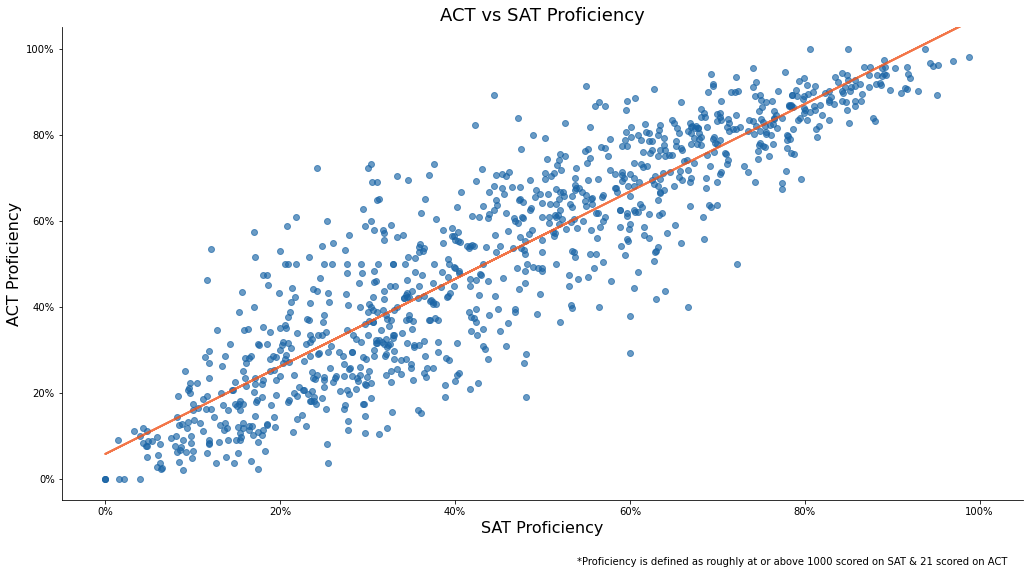

In [286]:
# Figure
fig, ax = plt.subplots()
fig.set_size_inches(15,8)

plt.xlim([-5, 105])
plt.ylim([-5, 105])

# Labels
plt.title('ACT vs SAT Proficiency', size=18)
plt.xlabel('SAT Proficiency', size=16)
plt.ylabel('ACT Proficiency', size=16)
plt.text(x=54, y= -20, s='*Proficiency is defined as roughly at or above 1000 scored on SAT & 21 scored on ACT')

# Plot
plt.scatter(x=both_scores['abv_pct_both'], y=both_scores['abv_avg_pct'], alpha=.65, color=colors_h['12'])
plt.plot(both_scores['abv_pct_both'], y_pred, c=colors_h['1'], linewidth=2, alpha=.8)

# Re-label as %s
warnings.filterwarnings('ignore')
vals = ax.get_xticks()
vals = [str(int(val)) + '%' for val in vals]
ax.set_xticklabels(vals)
ax.set_yticklabels(vals)
warnings.filterwarnings('default')
# Label setting addapted from Stackoverflow user: Jianxun Li

# Graph
plt.tight_layout()
sns.despine()
plt.show();

##### Labeling source: https://stackoverflow.com/a/31357733
#
#

#### Confirm correlation via matrix
0.898 is a very high correlation. Logic would also dictate success on the ACT would lead to success on the SAT. No real surprises here.

Because the correlation is so high, SAT & ACT data will be used interchangeably.

In [287]:
both_scores[['abv_pct_both', 'abv_avg_pct']].corr()

,abv_pct_both,abv_avg_pct
abv_pct_both,1.000000,0.898466
abv_avg_pct,0.898466,1.000000


#
#
#### Define functions to apply to data frames while aggregating summary statistics

In [288]:
def calc_pct_sat(x):
    df = {}
    df['num_schools'] = int(x['enrollment_12'].count())                                                 # sum number of schools in sample
    df['enrollment'] = int(x['enrollment_12'].sum())                                                    # sum number of students in grade 12 of the sample
    df['test_takers'] = int(x['test_takers'].sum())                                                     # sum number of students that completed SAT exam
    df['pct_takers'] = round(x['test_takers'].sum() / x['enrollment_12'].sum(), 2)                      # convert number of test takers to a percentage of enrolled students
    df['avg_eng'] = round(x['avg_eng'].sum() / x['test_takers'].sum(), 2)                               # calculate average number of test takers proficient in SAT English
    df['avg_math'] = round(x['avg_math'].sum() / x['test_takers'].sum(), 2)                             # calculate average number of test takers proficient in SAT Math
    df['abv_avg_both'] = round(x['abv_avg_both'].sum() / x['test_takers'].sum(), 2)                     # calculate average number of test takers proficient in SAT Math & Eng
    # adapted from pretagteam.com
    return pd.Series(df, index=['num_schools', 'enrollment', 'test_takers', 'pct_takers', 'avg_eng', 'avg_math', 'abv_avg_both'])

def calc_pct_act(x):
    df = {}
    df['num_schools'] = int(x['enrollment_12'].count())                                                 # sum number of schools in sample
    df['enrollment'] = int(x['enrollment_12'].sum())                                                    # sum number of students in grade 12 of the sample
    df['test_takers'] = int(x['test_takers'].sum())                                                     # sum number of students that completed ACT exam
    df['pct_takers'] = round(x['test_takers'].sum() / x['enrollment_12'].sum(), 2)                      # convert number of test takers to a percentage of enrolled students
    df['avg_read'] = round(sum(x['avg_read'] * x['test_takers']) / x['test_takers'].sum(), 2)           # calculate weighted average ACT score for test takers in Reading
    df['avg_eng'] = round(sum(x['avg_eng'] * x['test_takers']) / x['test_takers'].sum(), 2)             # calculate weighted average ACT score for test takers in English
    df['avg_math'] = round(sum(x['avg_math'] * x['test_takers']) / x['test_takers'].sum(), 2)           # calculate weighted average ACT score for test takers in Math
    df['avg_sci'] = round(sum(x['avg_sci'] * x['test_takers']) / x['test_takers'].sum(), 2)             # calculate weighted average ACT score for test takers in Science
    df['comp_score'] = round((df['avg_read'] + df['avg_eng'] + df['avg_math'] + df['avg_sci']) / 4, 2)  # compile aggregate ACT score (final score)
    df['abv_avg_pct'] = round(x['abv_avg_num'].sum() / x['test_takers'].sum(), 2)                       # calculate average number of test takers proficient in ACT all cats
    # adapted from pretagteam.com
    return pd.Series(df, index=['num_schools', 'enrollment', 'test_takers', 'pct_takers', 'avg_read', 'avg_eng', 'avg_math', 'avg_sci', 'comp_score', 'abv_avg_pct'])


##### Source: https://pretagteam.com/question/how-to-use-groupby-to-apply-multiple-functions-to-multiple-columns-in-pandas
#

#### Aggregate data by Charter status for all of California

In [289]:
school_v_charter_sat = df_school_sat.groupby(by='is_charter').apply(calc_pct_sat)
school_v_charter_act = df_school_act.groupby(by='is_charter').apply(calc_pct_act)

#### Inspect data

In [290]:
school_v_charter_sat

,num_schools,enrollment,test_takers,pct_takers,avg_eng,avg_math,abv_avg_both
is_charter,,,,,,,
0,1033.0,382297.0,152427.0,0.40,0.69,0.49,0.46
1,228.0,32969.0,15785.0,0.48,0.61,0.39,0.36


In [291]:
school_v_charter_act

,num_schools,enrollment,test_takers,pct_takers,avg_read,avg_eng,avg_math,avg_sci,comp_score,abv_avg_pct
is_charter,,,,,,,,,,
0,866.0,354284.0,70281.0,0.20,22.92,22.20,22.44,22.22,22.44,0.58
1,150.0,23497.0,10130.0,0.43,19.32,18.58,19.16,19.05,19.03,0.34


In [292]:
# Saving total number of schools per category for filtering
num_schools_sat = school_v_charter_sat['num_schools'].values[0]
num_charter_sat = school_v_charter_sat['num_schools'].values[1]

num_schools_act = school_v_charter_act['num_schools'].values[0]
num_charter_act = school_v_charter_act['num_schools'].values[1]

### Graph State ACT data

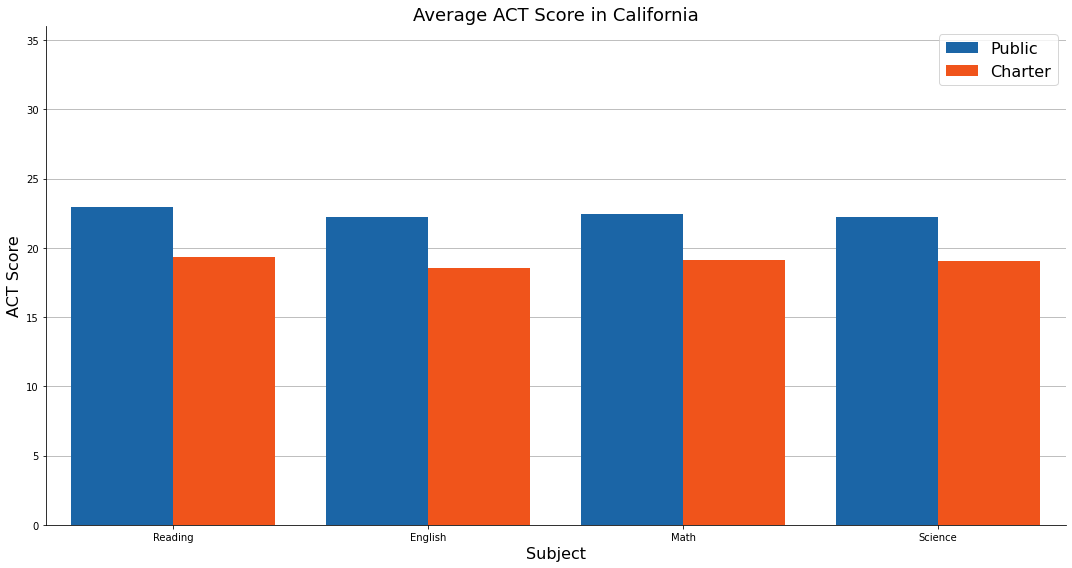

In [293]:
# Data
graph_all = school_v_charter_act.rename(columns={'avg_read':'Reading', 'avg_eng':'English', 'avg_math': 'Math', 'avg_sci': 'Science'})

# Figure
plt.figure(figsize=(15, 8))
plt.title('Average ACT Score in California', size=18)
ax1 = plt.subplot(1, 1, 1)
w = 0.4
X = np.arange(4)

# Labels
plt.grid(which='major', axis='y', zorder=-1.0)
plt.axis([-0.5,3.5,0, 36])

plt.xticks(X)
ax1.set_xticklabels(['Reading', 'English', 'Math', 'Science'])

plt.ylabel('ACT Score', size=16)
plt.xlabel('Subject', size=16)

# Plot
ax1.bar(x=X-.2, width=w, height=graph_all[['Reading', 'English', 'Math', 'Science']].loc[0,], color=colors_h['public'], label='Public')
ax1.bar(x=X+.2, width=w, height=graph_all[['Reading', 'English', 'Math', 'Science']].loc[1,], color=colors_h['charter'], label='Charter')

# Graph
plt.legend(prop={'size': 16})
plt.tight_layout()
sns.despine()
plt.show()

##### Surprising to see ACT scores significantly higher in Public schools relative to Charter schools! Maybe there are outliers pulling the data in various directions. Some Charter schools focus on students that may not be a perfect fit for public school. Lets look at the middle 50% of both Charter schools and Public schools.

#
### Examine Inner Quartile Range (Middle 50%)

In [294]:
# Middle 50% by state
mid_schools_sat = df_school_sat.sort_values(by='abv_pct_both', ascending=False)
mid_schools_act = df_school_act.sort_values(by='abv_avg_pct', ascending=False)

# SAT
# Filter mid Charter schools
mid_charter_sat = pd.DataFrame(mid_schools_sat[mid_schools_sat['is_charter'] == 1])
mid_charter_sat.reset_index(inplace=True, drop=True)
mid_charter_sat = mid_charter_sat.iloc[int(round(num_charter_sat*.25, 0)):int(round(num_charter_sat*.75, 0))]

# Filter mid Public schools
mid_schools_sat = pd.DataFrame(mid_schools_sat[mid_schools_sat['is_charter'] == 0])
mid_schools_sat.reset_index(inplace=True, drop=True)
mid_schools_sat = mid_schools_sat.iloc[int(round(num_schools_sat*.25, 0)):int(round(num_schools_sat*.75, 0))]

# Merge Charter & Public SAT
mid_schools_sat = pd.concat([mid_charter_sat, mid_schools_sat])

# ACT
# Filter mid Charter schools
mid_charter_act = pd.DataFrame(mid_schools_act[mid_schools_act['is_charter'] == 1])
mid_charter_act.reset_index(inplace=True, drop=True)
mid_charter_act = mid_charter_act.iloc[int(round(num_charter_act*.25, 0)):int(round(num_charter_act*.75, 0))]

# Filter mid Public schools
mid_schools_act = pd.DataFrame(mid_schools_act[mid_schools_act['is_charter'] == 0])
mid_schools_act.reset_index(inplace=True, drop=True)
mid_schools_act = mid_schools_act.iloc[int(round(num_schools_act*.25, 0)):int(round(num_schools_act*.75, 0))]

# Merge Charter & Public ACT
mid_schools_act = pd.concat([mid_charter_act, mid_schools_act])

#### Aggregate & display filtered data by Charter status

In [295]:
mid_schools_sat = mid_schools_sat.groupby(by='is_charter').apply(calc_pct_sat)
mid_schools_sat

,num_schools,enrollment,test_takers,pct_takers,avg_eng,avg_math,abv_avg_both
is_charter,,,,,,,
0,517.0,199634.0,75979.0,0.38,0.69,0.46,0.43
1,114.0,15701.0,7682.0,0.49,0.56,0.31,0.28


In [296]:
mid_schools_act = mid_schools_act.groupby(by='is_charter').apply(calc_pct_act)
mid_schools_act

,num_schools,enrollment,test_takers,pct_takers,avg_read,avg_eng,avg_math,avg_sci,comp_score,abv_avg_pct
is_charter,,,,,,,,,,
0,434.0,185043.0,27323.0,0.15,22.44,21.48,21.71,21.66,21.82,0.57
1,74.0,9883.0,4798.0,0.49,18.61,17.95,18.62,18.48,18.42,0.30


### Graph State Inner Quartile Range (IQR) SAT data

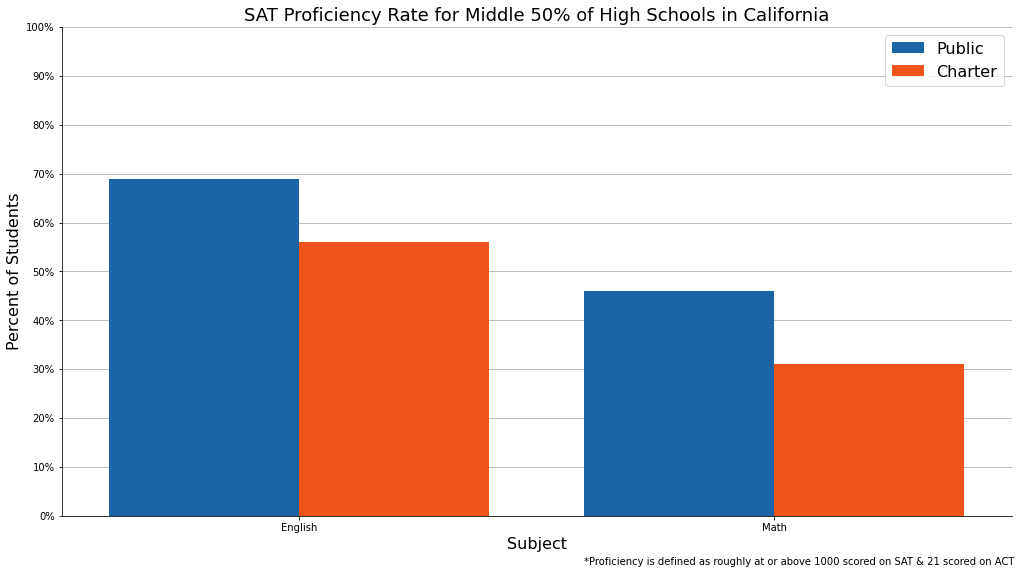

In [297]:
# Data
graph_mid = mid_schools_sat.rename(columns={'avg_eng':'English', 'avg_math': 'Math'})

# Figure
fig, ax2 = plt.subplots()
fig.set_size_inches(15,8)
plt.title('SAT Proficiency Rate for Middle 50% of High Schools in California', size=18)
ax2 = plt.subplot(1, 1, 1)
X_2 = np.arange(2)
Y_2 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
w_2 = 0.4

# Labels
plt.grid(which='major', axis='y', zorder=-1.0)
plt.axis([-0.5,1.5,0, 1])

plt.yticks(Y_2)
plt.xticks(X_2)
ax2.set_xticklabels(['English', 'Math'])

plt.ylabel('Percent of Students', size=16)
plt.xlabel('Subject', size=16)
plt.text(x=0.6, y= -.1, s='*Proficiency is defined as roughly at or above 1000 scored on SAT & 21 scored on ACT')

# Plot
ax2.bar(x=X_2-.2, width=w_2, height=graph_mid[['English', 'Math']].loc[0,], color=colors_h['public'], label='Public')
ax2.bar(x=X_2+.2, width=w_2, height=graph_mid[['English', 'Math']].loc[1,], color=colors_h['charter'], label='Charter')

# Re-label as %s
warnings.filterwarnings('ignore')
vals = ax2.get_yticks()
vals = [str(int(val*100)) + '%' for val in vals]
ax2.set_yticklabels(vals)
warnings.filterwarnings('default')
# Label setting addapted from Stackoverflow user: Jianxun Li

# Graph
plt.legend(prop={'size': 16})
sns.despine()
plt.tight_layout()
plt.show()


##### Labeling source: https://stackoverflow.com/a/31357733
#
#

##### Public schools continue to ourperform Charter schools. Next, lets examine the best of the best. The best Charter schools in the state will almost certainly outperform the best Public schools.
#
#
#
### Examine the top 10% performing Charter schools againts the top 10% performing Public schools

In [298]:
# Top 10% by state
top10_schools_sat = df_school_sat.sort_values(by='abv_pct_both', ascending=False)
top10_schools_act = df_school_act.sort_values(by='abv_avg_pct', ascending=False)

# SAT
# Filter top Charter schools
top10_charter_sat = pd.DataFrame(top10_schools_sat[top10_schools_sat['is_charter'] == 1])
top10_charter_sat.reset_index(inplace=True, drop=True)
top10_charter_sat = top10_charter_sat.iloc[0:int(round(num_charter_sat/10, 0))]

# Filter top non-Charter schools
top10_schools_sat = pd.DataFrame(top10_schools_sat[top10_schools_sat['is_charter'] == 0])
top10_schools_sat.reset_index(inplace=True, drop=True)
top10_schools_sat = top10_schools_sat.iloc[0:int(round(num_schools_sat/10, 0))]

top10_schools_sat = pd.concat([top10_charter_sat, top10_schools_sat])

# ACT
# Filter top Charter schools
top10_charter_act = pd.DataFrame(top10_schools_act[top10_schools_act['is_charter'] == 1])
top10_charter_act.reset_index(inplace=True, drop=True)
top10_charter_act = top10_charter_act.iloc[0:int(round(num_charter_act/10, 0))]

# Filter top non-Charter schools
top10_schools_act = pd.DataFrame(top10_schools_act[top10_schools_act['is_charter'] == 0])
top10_schools_act.reset_index(inplace=True, drop=True)
top10_schools_act = top10_schools_act.iloc[0:int(round(num_schools_act/10, 0))]

top10_schools_act = pd.concat([top10_charter_act, top10_schools_act])

#### Aggregate & display filtered data by Charter status

In [299]:
top10_schools_sat = top10_schools_sat.groupby(by='is_charter').apply(calc_pct_sat)
top10_schools_sat

,num_schools,enrollment,test_takers,pct_takers,avg_eng,avg_math,abv_avg_both
is_charter,,,,,,,
0,103.0,48107.0,18639.0,0.39,0.94,0.86,0.84
1,23.0,4933.0,2171.0,0.44,0.91,0.75,0.73


In [300]:
top10_schools_act = top10_schools_act.groupby(by='is_charter').apply(calc_pct_act)
top10_schools_act

,num_schools,enrollment,test_takers,pct_takers,avg_read,avg_eng,avg_math,avg_sci,comp_score,abv_avg_pct
is_charter,,,,,,,,,,
0,87.0,40446.0,12556.0,0.31,28.25,28.53,27.95,27.30,28.01,0.92
1,15.0,3970.0,1039.0,0.26,27.34,27.48,25.47,25.63,26.48,0.86


### Graph top performing schools aggregate ACT scores

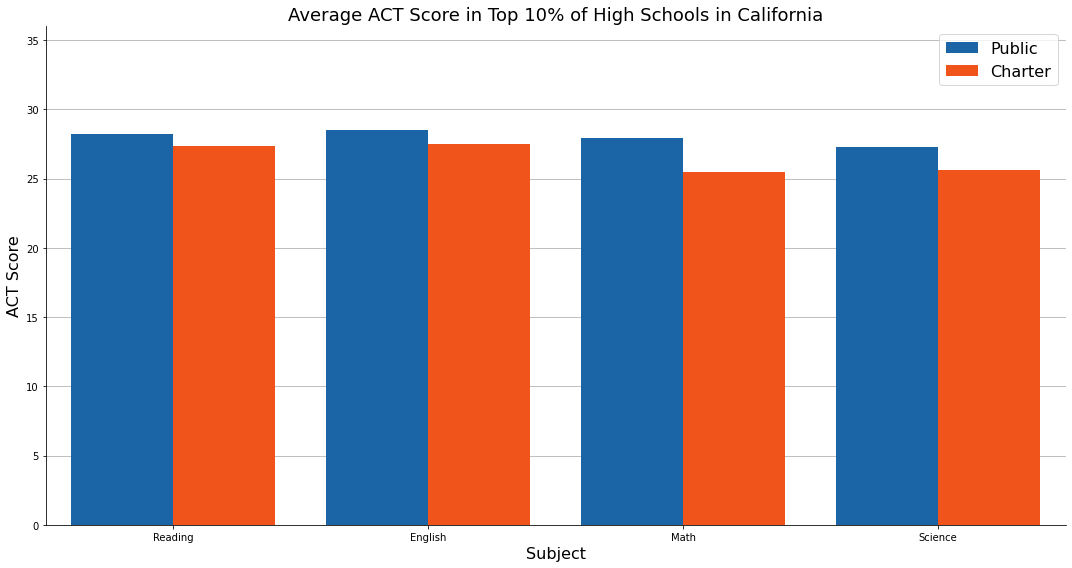

In [301]:
# Data
graph_top = top10_schools_act.rename(columns={'avg_read':'Reading', 'avg_eng':'English', 'avg_math': 'Math', 'avg_sci': 'Science'})

# Figure
plt.figure(figsize=(15, 8))
plt.title('Average ACT Score in Top 10% of High Schools in California', size=18)
ax3 = plt.subplot(1, 1, 1)

X_3 = np.arange(4)
w_3 = 0.4

# Labels
plt.grid(which='major', axis='y', zorder=-1.0)
plt.axis([-0.5,3.5,0, 36])
plt.xticks(X_3)
ax3.set_xticklabels(['Reading', 'English', 'Math', 'Science'])

plt.ylabel('ACT Score', size=16)
plt.xlabel('Subject', size=16)

# Plot
ax3.bar(x=X_3-.2, width=w_3, height=graph_top[['Reading', 'English', 'Math', 'Science']].loc[0,], color=colors_h['public'], label='Public')
ax3.bar(x=X_3+.2, width=w_3, height=graph_top[['Reading', 'English', 'Math', 'Science']].loc[1,], color=colors_h['charter'], label='Charter')

# Graph
plt.legend(prop={'size': 16})
plt.tight_layout()
sns.despine()
plt.show()


##### The gap in performance between Public and Charter schools has certainly narrowed at the top end of the spectrum. Public school still appear to outperform Charter schools in every subject.
##### It is possible a Charter school's most impactful contribution could be in educating the children of California left behind by the Public school system. Those that slipped through the cracks and nearly left behind. Let us examine the lower 10% in exam performance.
#
#
### Examine the bottom 10% performing Charter schools againts the bottom 10% performing Public schools

In [302]:
# Bottom 10% by state
bot10_schools_sat = df_school_sat.sort_values(by='abv_pct_both', ascending=True)
bot10_schools_act = df_school_act.sort_values(by='abv_avg_pct', ascending=True)

# SAT
# Filter bottom Charter schools
bot10_charter_sat = pd.DataFrame(bot10_schools_sat[bot10_schools_sat['is_charter'] == 1])
bot10_charter_sat.reset_index(inplace=True, drop=True)
bot10_charter_sat = bot10_charter_sat.iloc[0:int(round(num_charter_sat/10, 0))]

# Filter bottom non-Charter schools
bot10_schools_sat = pd.DataFrame(bot10_schools_sat[bot10_schools_sat['is_charter'] == 0])
bot10_schools_sat.reset_index(inplace=True, drop=True)
bot10_schools_sat = bot10_schools_sat.iloc[0:int(round(num_schools_sat/10, 0))]

bot10_schools_sat = pd.concat([bot10_charter_sat, bot10_schools_sat])

# ACT
# Filter bottom Charter schools
bot10_charter_act = pd.DataFrame(bot10_schools_act[bot10_schools_act['is_charter'] == 1])
bot10_charter_act.reset_index(inplace=True, drop=True)
bot10_charter_act = bot10_charter_act.iloc[0:int(round(num_charter_act/10, 0))]

# Filter bottom non-Charter schools
bot10_schools_act = pd.DataFrame(bot10_schools_act[bot10_schools_act['is_charter'] == 0])
bot10_schools_act.reset_index(inplace=True, drop=True)
bot10_schools_act = bot10_schools_act.iloc[0:int(round(num_schools_act/10, 0))]

bot10_schools_act = pd.concat([bot10_charter_act, bot10_schools_act])

#### Aggregate & display filtered data by Charter status

In [303]:
bot10_schools_sat = bot10_schools_sat.groupby(by='is_charter').apply(calc_pct_sat)
bot10_schools_sat

,num_schools,enrollment,test_takers,pct_takers,avg_eng,avg_math,abv_avg_both
is_charter,,,,,,,
0,103.0,20551.0,10264.0,0.50,0.29,0.10,0.08
1,23.0,2189.0,1073.0,0.49,0.29,0.08,0.07


In [304]:
bot10_schools_act = bot10_schools_act.groupby(by='is_charter').apply(calc_pct_act)
bot10_schools_act

,num_schools,enrollment,test_takers,pct_takers,avg_read,avg_eng,avg_math,avg_sci,comp_score,abv_avg_pct
is_charter,,,,,,,,,,
0,87.0,21899.0,7291.0,0.33,16.05,14.52,16.38,16.17,15.78,0.10
1,15.0,1551.0,1134.0,0.73,15.18,13.77,15.81,15.66,15.10,0.06


### Graph lowest performing school's SAT proficiency

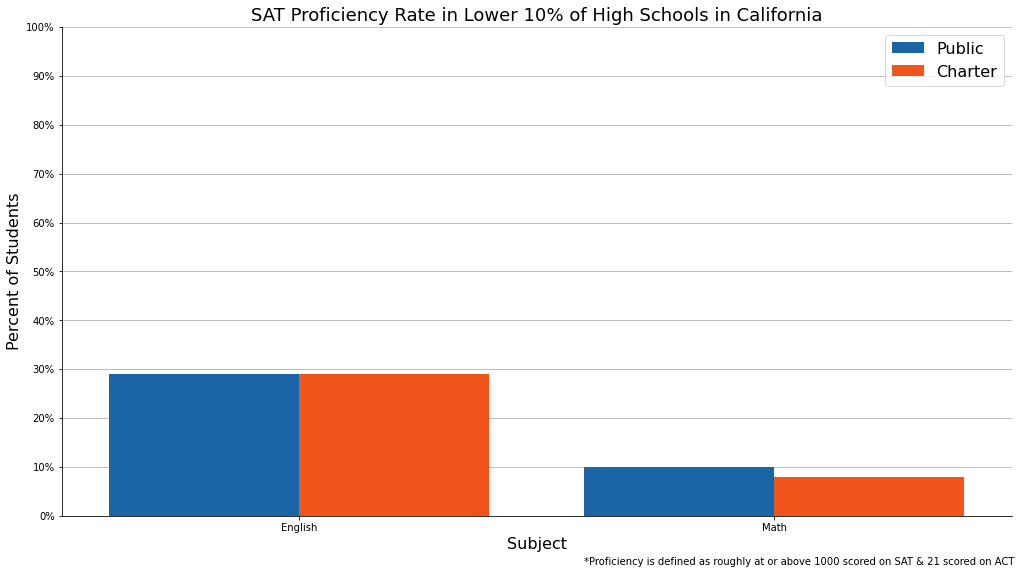

In [305]:
# Data
graph_bot = bot10_schools_sat.rename(columns={'avg_eng':'English', 'avg_math': 'Math'})

# Figure
fig, ax4 = plt.subplots()
fig.set_size_inches(15,8)
plt.title('SAT Proficiency Rate in Lower 10% of High Schools in California', size=18)
ax4 = plt.subplot(1, 1, 1)
Y_4 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
X_4 = np.arange(2)
w_4 = 0.4

# Labels
plt.grid(which='major', axis='y', zorder=-1.0)
plt.axis([-0.5,1.5,0, 1])

plt.yticks(Y_4)
plt.xticks(X_4)
ax4.set_xticklabels(['English', 'Math'])

plt.ylabel('Percent of Students', size=16)
plt.xlabel('Subject', size=16)
plt.text(x=0.6, y= -.1, s='*Proficiency is defined as roughly at or above 1000 scored on SAT & 21 scored on ACT')

# Plot
ax4.bar(x=X_4-.2, width=w_4, height=graph_bot[['English', 'Math']].loc[0,], color=colors_h['public'], label='Public')
ax4.bar(x=X_4+.2, width=w_4, height=graph_bot[['English', 'Math']].loc[1,], color=colors_h['charter'], label='Charter')

# Re-label as %s
warnings.filterwarnings('ignore')
vals = ax4.get_yticks()
vals = [str(int(val*100)) + '%' for val in vals]
ax4.set_yticklabels(vals)
warnings.filterwarnings('default')
# Label setting addapted from Stackoverflow user: Jianxun Li

# Graph
plt.legend(prop={'size': 16})
plt.tight_layout()
sns.despine()
plt.show()


##### SAT proficiency rates are nearly identical for Charter & Public schools. It is certainly possible the Charter schools are handling some of the more troubled kids in the state, however there is no shortage of troubled children at some of California's Public schools. What is most troubling is the proficiency rate in mathematics is woefully low for both Public and Charter schools.
##### For our final examination of aggregate ACT data, lets examine scores aggregated by County. Previously, we grouped data by overall performance. This tactic could compare test scores from the massive Los Angeles County against those in the smallest of Counties in Northern or Eastern California. We could potentially be comparing apples to oranges. Aggregating data by County will help put the finishing touches on the picture our data is painting. Lets take a look.

##### Labeling source: https://stackoverflow.com/a/31357733
#
#

### Examine test scores of data filtered by County

#### Aggregate & display filtered data by Charter status

In [306]:
# Scores by County
sc_v_ch_county_act = df_school_act.groupby(by=['is_charter', 'county_name']).apply(calc_pct_act)

# Select only Counties with Charter schools (Fun Fact: not all Counties have Charter schools)
county_w_charter = list(sc_v_ch_county_act.loc[(1,)].index)

# Filter Public schools by Counites with Charter schools
schools_county_act = sc_v_ch_county_act.loc[(0 , )].loc[county_w_charter]
charters_county_act = sc_v_ch_county_act.loc[(1, )]

#### Filter out Counties with fewer than 50 tests taken by Charter school students

In [307]:
charters_county_act = charters_county_act[charters_county_act['test_takers'] >= 50]
graph_charters = charters_county_act.index
schools_county_act = schools_county_act.loc[graph_charters].sort_values(by='abv_avg_pct', ascending=False)

#### Inspect County level data

In [308]:
schools_county_act

,num_schools,enrollment,test_takers,pct_takers,avg_read,avg_eng,avg_math,avg_sci,comp_score,abv_avg_pct
county_name,,,,,,,,,,
Santa Clara,36.0,16592.0,3816.0,0.23,27.39,27.34,27.15,26.67,27.14,0.83
Alameda,30.0,12798.0,2865.0,0.22,26.26,26.07,25.82,25.28,25.86,0.78
San Mateo,16.0,5916.0,1206.0,0.20,25.99,25.48,25.58,24.92,25.49,0.78
Contra Costa,28.0,11362.0,2787.0,0.25,25.85,25.39,24.84,24.73,25.20,0.75
Orange,65.0,34533.0,8156.0,0.24,24.53,24.38,24.30,23.85,24.26,0.72
Sonoma,13.0,3870.0,711.0,0.18,24.84,23.83,23.34,23.36,23.84,0.72
San Diego,64.0,30406.0,6934.0,0.23,24.14,23.62,23.60,23.46,23.71,0.67
San Joaquin,21.0,8001.0,950.0,0.12,22.15,21.28,21.80,21.67,21.72,0.56
San Francisco,13.0,3737.0,944.0,0.25,21.99,21.28,22.34,21.31,21.73,0.55


In [309]:
# Re-order to match Public school index
charters_county_act = charters_county_act.loc[schools_county_act.index]
charters_county_act

,num_schools,enrollment,test_takers,pct_takers,avg_read,avg_eng,avg_math,avg_sci,comp_score,abv_avg_pct
county_name,,,,,,,,,,
Santa Clara,8.0,701.0,353.0,0.50,19.10,18.80,19.04,19.23,19.04,0.32
Alameda,9.0,909.0,664.0,0.73,18.44,17.46,18.69,18.28,18.22,0.28
San Mateo,5.0,422.0,207.0,0.49,21.51,20.48,20.40,21.17,20.89,0.46
Contra Costa,4.0,764.0,357.0,0.47,20.08,18.67,19.19,19.25,19.30,0.36
Orange,4.0,1214.0,288.0,0.24,26.40,26.11,23.32,24.23,25.02,0.75
Sonoma,1.0,147.0,89.0,0.61,17.00,16.00,18.00,18.00,17.25,0.22
San Diego,16.0,2826.0,962.0,0.34,21.71,20.73,21.28,21.12,21.21,0.52
San Joaquin,5.0,638.0,327.0,0.51,19.71,18.49,18.91,18.75,18.96,0.37
San Francisco,3.0,240.0,115.0,0.48,19.66,18.43,18.32,18.32,18.68,0.33


### Graph ACT performance by County

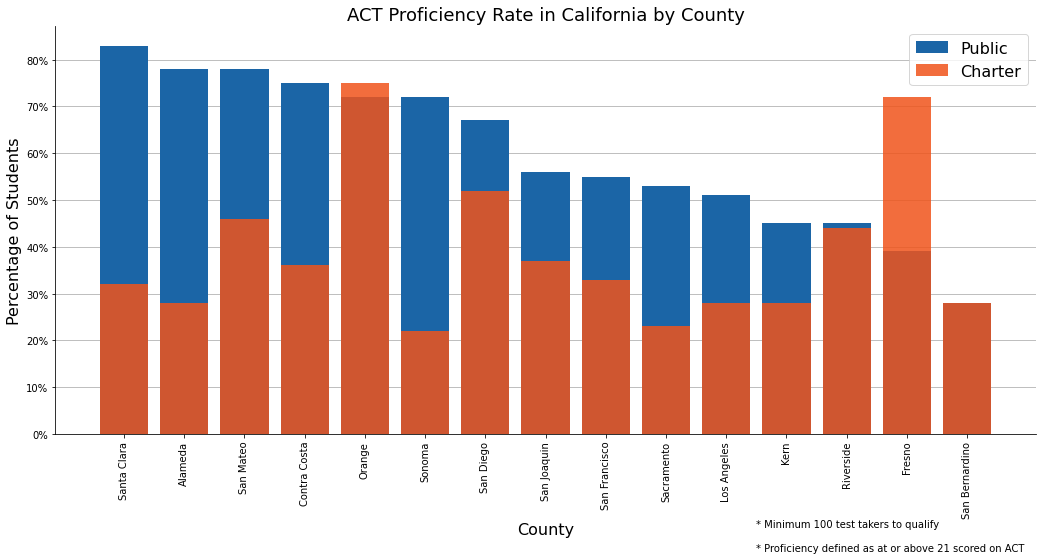

In [310]:
# Figure
fig, ax5 = plt.subplots()
fig.set_size_inches(15,8)
plt.title("ACT Proficiency Rate in California by County", size=18)

# Labels
plt.grid(which='major', axis='y', zorder=-1.0)
plt.xticks(rotation=90)

plt.xlabel("County", size=16)
plt.ylabel("Percentage of Students", size=16)

plt.text(x=10.5, y=-0.2, s='* Minimum 100 test takers to qualify')
plt.text(x=10.5, y=-0.25, s='* Proficiency defined as at or above 21 scored on ACT')

# Plot
plt.bar(x=schools_county_act.index, height=schools_county_act['abv_avg_pct'], color=colors_h['public'], alpha=1, label='Public')
plt.bar(x=charters_county_act.index, height=charters_county_act['abv_avg_pct'], color=colors_h['charter'], alpha=.85, label='Charter')

# Re-label as %s
warnings.filterwarnings('ignore')
vals = ax5.get_yticks()
vals = [str(int(val*100)) + '%' for val in vals]
ax5.set_yticklabels(vals)
warnings.filterwarnings('default')
# Label setting addapted from Stackoverflow user: Jianxun Li

# Graph
plt.legend(prop={'size': 16})
plt.tight_layout()
sns.despine()
plt.show()

#### Despite a couple success stories, not the greatest showing for Charter schools, at large. A few things catch the eye. Charter schools in Orange County are having amazing success. Orange County happens to be one of the most expensive Counties in the Unite States, so maybe the high proficiency rates have more to do with children in homes with financial stability. An assumption worth more focused research. 
#### The elephant in the room is clearly Fresno County. Charter schools have nearly double the ACT proficiency than Public schools. If we take a slightly closer look our sample population consists of 2 Charter schools with 76% of enrolled 12th grade students taking the ACT. 117 students to be exact. On the other side of the coin Fresno County has 25 qualifying Public schools with 1,600 test takers. 1,600 test takers is only 16% of enrolled 12th grade students. Clearly, Fresno's Charter schools have a working formula. Sacramento, Alameda, and essentially, all other Charter schools should visit Fresno County Charter school.

#### Further examination into Fresno County is warranted.

##### Labeling source: https://stackoverflow.com/a/31357733
#
#

#
#
### Rank CA Counties by Composite ACT Score for graphing

In [311]:
# Compile ACT scores by County and Charter status
county_act = df_school_act.groupby(by=['county_name', 'is_charter']).apply(calc_pct_act)
best_counties = county_act.sort_values(by='comp_score', ascending=False)

# Export the data for further examination
best_counties.to_csv('./data-clean/best_counties.csv')

#### We have compiled data for the Counties of California. We can now use this data to make an informed decision about where parents may want to consider sending their children to school to offer them the best chance at getting into a great University. Lets compare housing prices to ACT test scores. Sample size and number of test takers is less important in the analysis since we will be focusing on a singular hypothetical family.

In [342]:
renamed = {
    'county_name': 'County',
    'is_charter': 'Charter',
    'num_schools': 'Numb Schools',
    'test_takers': 'Test Takers',
    'comp_score': 'ACT Score',
    'abv_avg_pct': '% Abv Avg',
    
}

renamed_sat = {
    'county_name': 'County',
    'is_charter': 'Charter',
    'num_schools': 'Numb Schools',
    'test_takers': 'Test Takers',
    'abv_avg_both': 'Profic SAT %'
    
}

#### Notable highlights of findings

In [336]:
best_counties.reset_index().rename(columns=renamed).drop(columns=['enrollment', 'pct_takers', 'avg_read', 'avg_eng', 'avg_math', 'avg_sci']).sort_values(by='County')[:50]

,County,Charter,Numb Schools,Test Takers,ACT Score,% Abv Avg
44,San Mateo,1,5.0,207.0,20.89,0.46
6,Santa Barbara,1,1.0,49.0,25.25,0.82
30,Santa Barbara,0,9.0,746.0,22.60,0.60
57,Santa Clara,1,8.0,353.0,19.04,0.32
2,Santa Clara,0,36.0,3816.0,27.14,0.83
0,Santa Cruz,1,1.0,48.0,28.00,0.96
38,Santa Cruz,0,8.0,502.0,21.54,0.52
11,Shasta,0,3.0,98.0,24.34,0.82
1,Shasta,1,1.0,24.0,27.25,0.88
43,Siskiyou,0,2.0,65.0,20.94,0.48


In [337]:
school_v_charter_sat.head()

,num_schools,enrollment,test_takers,pct_takers,avg_eng,avg_math,abv_avg_both
is_charter,,,,,,,
0,1033.0,382297.0,152427.0,0.40,0.69,0.49,0.46
1,228.0,32969.0,15785.0,0.48,0.61,0.39,0.36


In [343]:
school_v_charter_sat.reset_index().rename(columns=renamed_sat).drop(columns=['enrollment', 'pct_takers', 'avg_eng', 'avg_math'])

,Charter,Numb Schools,Test Takers,Profic SAT %
0,0,1033.0,152427.0,0.46
1,1,228.0,15785.0,0.36
